In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from Utils.univariate_featureSelection import featureSelectionResults
from Utils.setupDataset import get_dataset, combine_datasets
from Utils.feature_vector import get_feature_names
import numpy as np


fnames = get_feature_names()

m_dataset = get_dataset("dataset.pickle")
w_dataset = get_dataset("wiki_dataset.pickle")

w2_dataset = get_dataset("wiki_dataset_new.pickle")

m_filename = 'rankSelections_myDataset.csv'
w_filename = 'rankSelections_wikiDataset.csv'


m_rfe = 'm_RFE_ranks.csv'
w_rfe = 'w_RFE_ranks.csv'

m_dfs = []
w_dfs = []


def get_stepwise_results(dataset, rankfile, rfe_file, k=5, start=1, end=69):
    dfs = []
    for i in range(start, end):
        results = featureSelectionResults(dataset, rankfile, rfe_file, i, k)
        df = results.data_frame()
        dfs.append(df)
    return dfs

def get_stepwise_scores(dfs, scorename='f1', start=1, end=69):
    noselection = []
    RFE = []
    combined= []
    chi = []
    mi = []
    ranksum = []
    ftest = []

    for df in dfs[start:end]:
        noselection.append(df[scorename]['no selection'])
        RFE.append(df[scorename]['RFE'])
        combined.append(df[scorename]['combined'])
        ftest.append(df[scorename]['f-test'])
        ranksum.append(df[scorename]['ranksum'])
        chi.append(df[scorename]['chi2'])
        mi.append(df[scorename]['mi'])
    
    return noselection, RFE, combined, ftest, ranksum, chi, mi


def plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=15, end=45, title="my dataset", scorename='f1 score'):
    if end > len(noselection):
        end = len(noselection)
    x_axis = np.arange(start, end)

    plt.plot(x_axis,noselection[start:end], color="red", linewidth=3, linestyle="-", label="no selection")
    plt.plot(x_axis,RFE[start:end], color="green", linewidth=2, linestyle="-", label="RFE") 
    plt.plot(x_axis,ftest[start:end], color="blue", linewidth=2, linestyle="-", label="f-test") 
    plt.plot(x_axis,ranksum[start:end], color="pink", linewidth=2, linestyle="-", label="ranksum") 
    plt.plot(x_axis,chi[start:end], color="orange", linewidth=2, linestyle="-", label="chi2") 
    plt.plot(x_axis,mi[start:end], color="#98df8a", linewidth=2, linestyle="-", label="mi") 
    plt.plot(x_axis,combined[start:end], color="#aec7e8", linewidth=2, linestyle="-", label="combined") 
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.suptitle(title)
    plt.xlabel('n Features')
    plt.ylabel(scorename)
    plt.show()
    


In [2]:
len(w2_dataset["target"])

6987

# my dataset

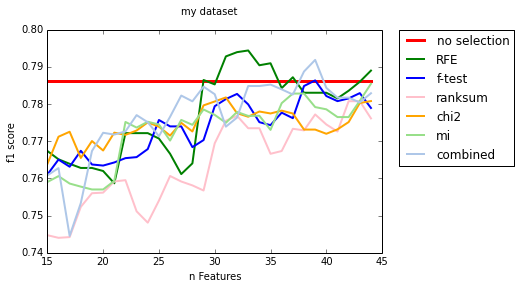

In [2]:
dfs = get_stepwise_results(m_dataset, m_filename, m_rfe  )


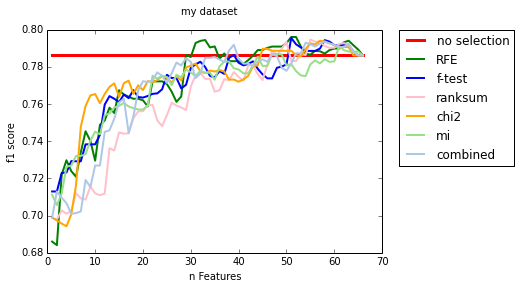

In [20]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(dfs, scorename='f1')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=68)

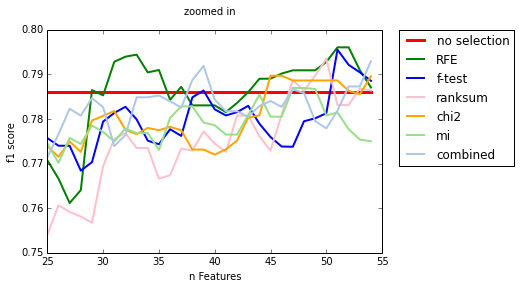

In [22]:
# ZOOOOM
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(dfs, scorename='f1')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=25, end=55, title="zoomed in")

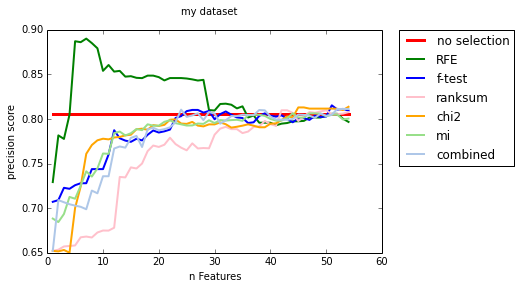

In [23]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(dfs, scorename='precision')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=55, scorename='precision score')

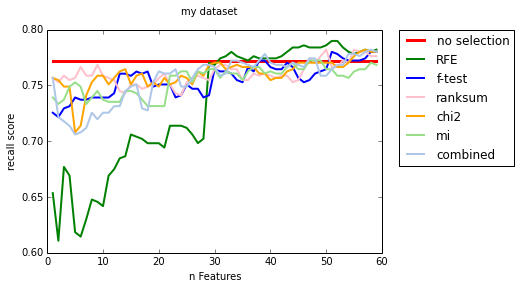

In [24]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(dfs, scorename='recall')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=60, scorename='recall score')

# wiki dataset

In [3]:
w_dfs = get_stepwise_results(w2_dataset, w_filename, w_rfe)

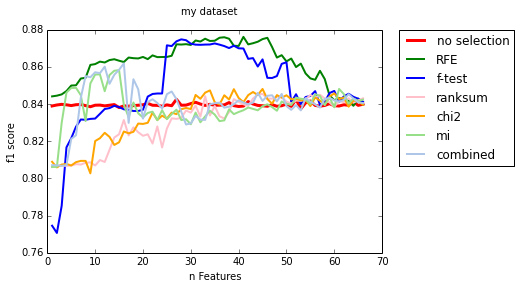

In [4]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(w_dfs, scorename='f1')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=68)

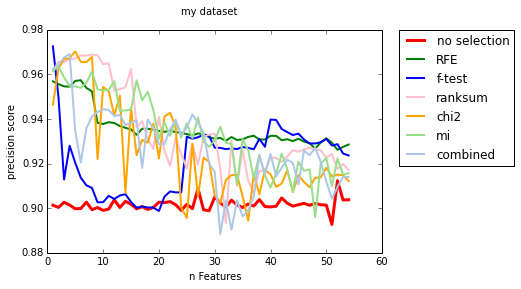

In [5]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(w_dfs, scorename='precision')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=55, scorename='precision score')

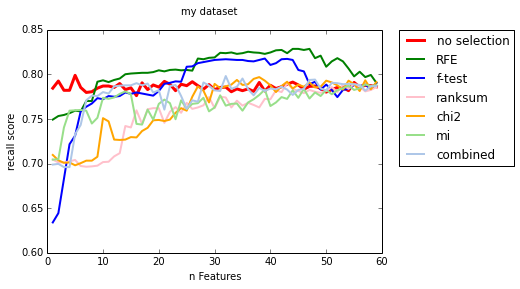

In [31]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(w_dfs, scorename='recall')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=60, scorename='recall score')